In [1]:
import numpy as np
import pandas as pd 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
data_dir=r"C:\Users\suhas\Desktop\food classification\Food Classification"
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 6269 files belonging to 20 classes.


In [6]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [7]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode='categorical',
    subset = 'validation')

Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.


In [8]:
model=InceptionV3(weights='imagenet',include_top=False,input_shape=(228,228,3),pooling='avg')
for layer in model.layers:
    layer.trainable=False

87910968/87910968 [==============================] - 19s 0us/step


In [9]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [10]:
input=model.output
input=BatchNormalization(axis=-1)(input)
input=Dense(1024,activation='relu')(input)
input=Dropout(0.3)(input)
output = Dense(20, activation='softmax')(input)
m = Model(inputs = model.input, outputs = output)
m.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [11]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 228, 228, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

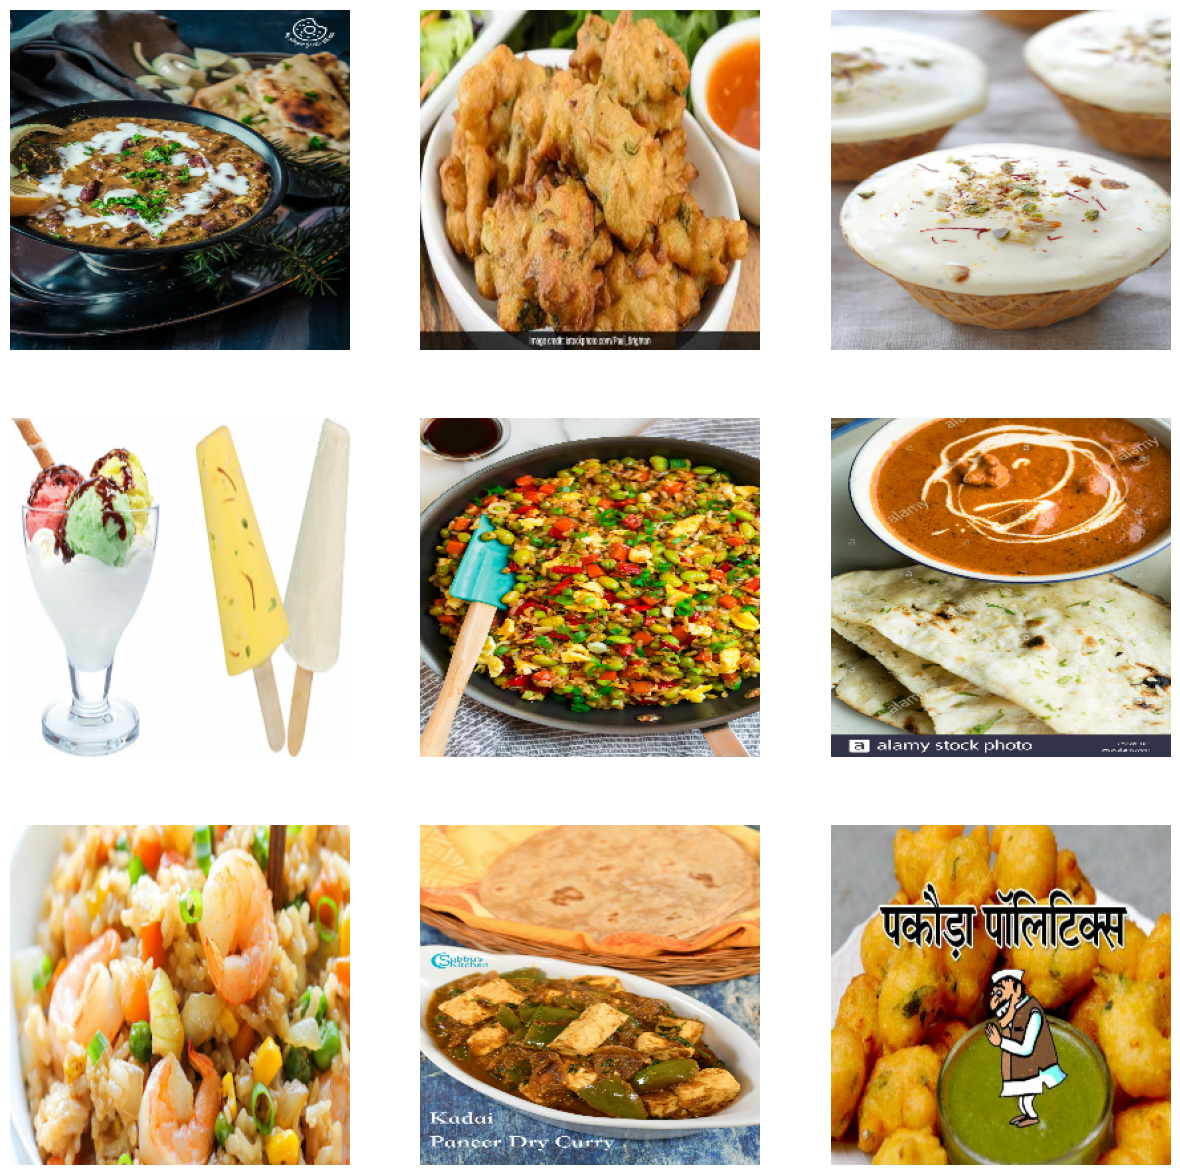

In [12]:
import matplotlib.pyplot as plt
def show_img(data):
    plt.figure(figsize=(15,15))
    for images,labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

#Plotting the images in dataset
show_img(data)

In [13]:
batch_size=32
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size
his=m.fit_generator(train_data,
                    validation_data = val_data,
                    epochs = 5,
                    verbose = 1)

C:\Users\suhas\AppData\Local\Temp\ipykernel_23636\898241240.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=m.fit_generator(train_data,


Epoch 1/5
157/157 [==============================] - 629s 4s/step - loss: 1.9302 - accuracy: 0.5764 - val_loss: 0.8561 - val_accuracy: 0.7598
Epoch 2/5
157/157 [==============================] - 460s 3s/step - loss: 1.3687 - accuracy: 0.6801 - val_loss: 0.7674 - val_accuracy: 0.7896
Epoch 3/5
157/157 [==============================] - 256s 2s/step - loss: 1.1529 - accuracy: 0.7189 - val_loss: 0.7445 - val_accuracy: 0.7936
Epoch 4/5
157/157 [==============================] - 297s 2s/step - loss: 0.9839 - accuracy: 0.7440 - val_loss: 0.7553 - val_accuracy: 0.8008
Epoch 5/5
157/157 [==============================] - 245s 2s/step - loss: 0.8721 - accuracy: 0.7534 - val_loss: 0.6180 - val_accuracy: 0.8217


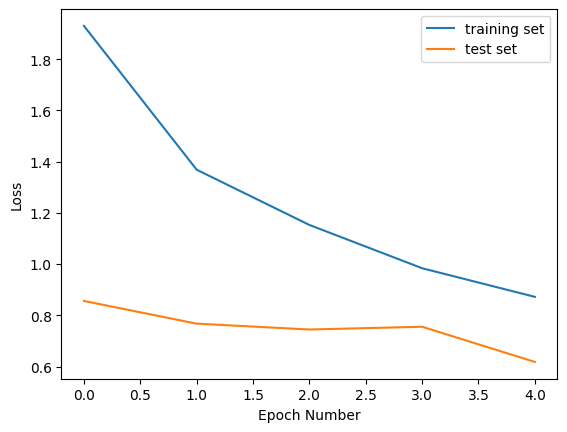

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(his.history['loss'], label='training set')
plt.plot(his.history['val_loss'], label='test set')
plt.legend()

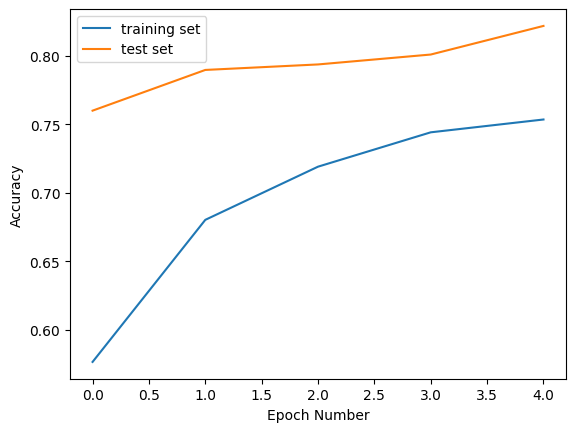

In [15]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(his.history['accuracy'], label='training set')
plt.plot(his.history['val_accuracy'], label='test set')
plt.legend()

In [16]:
results=m.evaluate(train_data
                  )
results

157/157 [==============================] - 188s 1s/step - loss: 0.5292 - accuracy: 0.8392


[0.5291541814804077, 0.8391719460487366]

In [17]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [18]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
predict_image('../input/indian-food-classification/Food Classification/burger/007.jpg',m)

FileNotFoundError: [Errno 2] No such file or directory: '../input/indian-food-classification/Food Classification/burger/007.jpg'

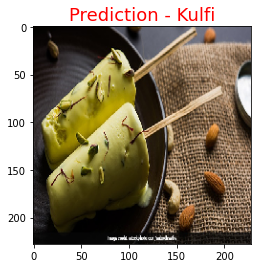

In [ ]:
predict_image('../input/indian-food-classification/Food Classification/kulfi/001.jpg',m)

In [ ]:
model_name = 'food_recognition_inceptionV3.h5'
m.save(model_name, save_format='h5')